In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CHEM274.importer_snippets import load_experiment
plt.style.use('JGW')

# Nyquist and Bode Plots

In [2]:
EIS = load_experiment()

In [ ]:
# Nyquist
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Nyquist Plot')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(EIS.data['Zre'], -EIS.data['Zim'], label = 'data')
ax.set_xlabel('$Z_{re}$ / $\Omega$')
ax.set_ylabel('-$Z_{im}$ / $\Omega$')
if (max(EIS.data['Zre']) >= max(-EIS.data['Zim'])):
    axes_max = max(EIS.data['Zre'])
else:
    axes_max = max(-EIS.data['Zim'])
ax.set_xlim ([0,1.1*axes_max])
ax.set_ylim ([0,1.1*axes_max])

In [ ]:
# Bode
Z_mag = np.sqrt(EIS.data['Zre']**2 * EIS.data['Zim']**2)
log_Z_mag = np.log10(Z_mag)
phi = np.arctan(EIS.data['Zim'] / EIS.data['Zre']) * 180 / np.pi # phase angle in degrees
log_omega = np.log10(EIS.data['f'])


fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Bode Plot')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.plot(log_omega, log_Z_mag, label = 'Impedance')
ax.set_ylabel('log$|Z|$', color='C0')
ax.set_xlabel('log$\omega$')

ax2 = ax.twinx()
ax2.plot(log_omega, phi, label = 'Phase', color='C1')
ax2.set_ylabel('$\phi$ / degrees', color='C1')
plt.grid()

# Cyclic Voltammograms

In [ ]:
CV = load_experiment()

Text(0, 0.5, '$i_{w}$ / $A$')

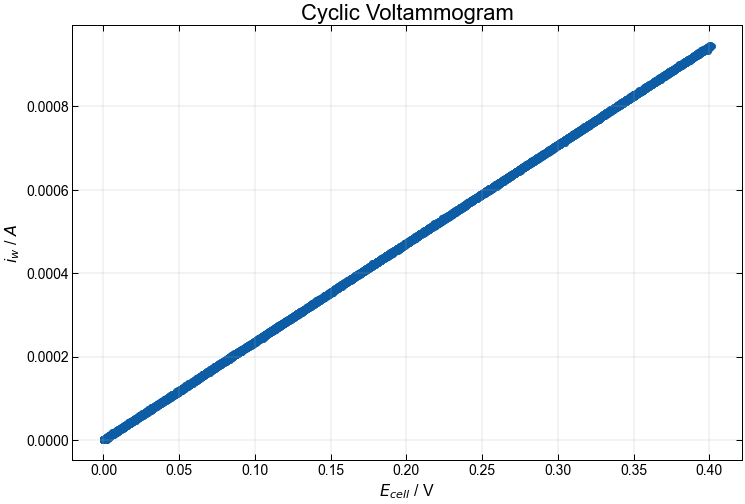

In [5]:
# CV
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Cyclic Voltammogram')
ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
# ax.set_prop_cycle(cc2)
ax.scatter(CV.data['Ecell'], CV.data['iw'], label = '$v=$ '+str(CV.params.iloc[0, 1]))
ax.set_xlabel('$E_{cell}$ / V')
ax.set_ylabel('$i_{w}$ / $A$')